In [1]:
from disaggregator import config, data, spatial, temporal, plot
import pandas as pd
import matplotlib.pyplot as plt

# Power by 'Time Use Survey' (ZVE, only 2015)

Get spatial data in [MWh] that shall be disaggregated temporally

In [2]:
df_spat = spatial.disagg_households_power('population', weight_by_income=True) * 1e3
df_spat

nuts3
DE111    1.162713e+06
DE112    6.942694e+05
DE113    9.678796e+05
DE114    4.479099e+05
DE115    9.955292e+05
             ...     
DEG0K    1.156523e+05
DEG0L    1.437641e+05
DEG0M    1.262784e+05
DEG0N    5.985672e+04
DEG0P    1.821599e+05
Name: value, Length: 401, dtype: float64

Calculate temporal distribution keys based on the ZVE. They will be saved in your `data_out` folder. This step can take up to 60 Minutes but is only necessary once.

In [3]:
temporal.make_zve_load_profiles()

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


disaggregator.temporal: INFO     Creating ZVE-profile for Stuttgart (DE111)
disaggregator.temporal: INFO     Calc load profile for household-size: 1
disaggregator.temporal: INFO     Calc load profile for household-size: 2
disaggregator.temporal: INFO     Calc load profile for household-size: 3
disaggregator.temporal: INFO     Calc load profile for household-size: 4
disaggregator.temporal: INFO     Calc load profile for household-size: 5
disaggregator.temporal: INFO     ...creating hourly load profile for entire year...
disaggregator.temporal: INFO     Creating ZVE-profile for Böblingen (DE112)
disaggregator.temporal: INFO     Calc load profile for household-size: 1
disaggregator.temporal: INFO     Calc load profile for household-size: 2
disaggregator.temporal: INFO     Calc load profile for household-size: 3
disaggregator.temporal: INFO     Calc load profile for household-size: 4
disaggregator.temporal: INFO     Calc load profile for household-size: 5
disaggregator.temporal: INFO     .

KeyboardInterrupt: 

Then load the temporal distribution keys based on the ZVE:

In [3]:
df_temp = (pd.read_csv(config.data_out('ZVE_timeseries_AllRegions_2015.csv'),
                       engine='c', index_col=0, parse_dates=True,
                       infer_datetime_format=True)
              .pipe(data.transpose_spatiotemporal))
df_temp

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
DE111,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000132,0.000121,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
DE112,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000132,0.000121,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
DE113,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000131,0.000120,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
DE114,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000131,0.000120,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
DE115,0.000054,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000144,0.000132,0.000121,...,0.00011,0.000111,0.000136,0.000173,0.000189,0.000191,0.000184,0.000174,0.000131,0.000079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG0K,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000143,0.000131,0.000121,...,0.00011,0.000114,0.000138,0.000174,0.000188,0.000191,0.000184,0.000174,0.000131,0.000079
DEG0L,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000143,0.000131,0.000121,...,0.00011,0.000114,0.000138,0.000174,0.000188,0.000191,0.000184,0.000173,0.000131,0.000079
DEG0M,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000143,0.000131,0.000121,...,0.00011,0.000115,0.000138,0.000174,0.000188,0.000191,0.000184,0.000173,0.000131,0.000079
DEG0N,0.000053,0.000045,0.000042,0.000041,0.000047,0.000076,0.000134,0.000143,0.000132,0.000122,...,0.00011,0.000114,0.000138,0.000173,0.000188,0.000191,0.000184,0.000174,0.000131,0.000079


The function `temporal.disagg_temporal()` needs two inputs:
1. **a spatial dataset**  
    either as `pd.Series` or `pd.DataFrame`: in both cases _NUTS-3-index'ed_


2. **a temporal dataset**  
    if passed as `pd.DataFrame`: _NUTS-3-index'ed_  
    if passed as `pd.Series`: _pd.DateTimeIndex'ed_

Pre-check:
* Both `df_spat` and `df_temp` are `pd.DataFrame`s
* Both have NUTS-3-indices.

So now we can directly perfom the disaggregation:

In [4]:
df_elc_tempo_ZVE = temporal.disagg_temporal(df_spat, df_temp)
df_elc_tempo_ZVE

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
DE111,62.243096,52.126232,49.009933,47.478387,55.075697,88.759143,155.867967,167.129661,152.972696,140.248072,...,127.884639,129.204791,158.526482,200.867852,219.436620,222.137802,214.089070,202.246599,152.218293,92.287071
DE112,37.168059,31.126070,29.265026,28.350340,32.887385,53.002707,93.078833,99.804531,91.436438,83.775718,...,76.361392,77.085460,94.527074,119.874115,131.041281,132.655255,127.849916,120.778150,90.901379,55.110654
DE113,51.814067,43.391955,40.797721,39.522726,45.847246,73.887590,129.753235,139.128452,127.261214,116.463387,...,106.455208,107.554479,131.965348,167.266655,182.672132,184.921195,178.221492,168.363208,126.716053,76.825033
DE114,23.977962,20.080572,18.880060,18.290048,21.216790,34.192800,60.045343,64.345888,58.816884,53.726737,...,49.264726,49.815212,61.112960,77.477955,84.534197,85.574870,82.474331,77.912231,58.639579,35.551998
DE115,53.291912,44.630502,41.962479,40.651284,47.155769,75.994112,133.450182,143.091755,131.013930,120.206915,...,109.496528,110.672853,135.776451,171.978498,187.875086,190.187102,183.295229,173.155909,130.324063,79.013796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG0K,6.184371,5.181835,4.872785,4.721075,5.474694,8.816397,15.475622,16.567142,15.158041,13.976416,...,12.720572,13.186998,15.955136,20.100347,21.788890,22.046708,21.243819,20.067565,15.106155,9.162467
DEG0L,7.686875,6.441060,6.056989,5.868472,6.805049,10.958076,19.234237,20.584787,18.828011,17.372849,...,15.812597,16.418333,19.858781,24.989838,27.089108,27.400320,26.402020,24.940035,18.774261,11.387739
DEG0M,6.750356,5.656935,5.319789,5.154349,5.976532,9.622400,16.888233,18.073631,16.527329,15.258049,...,13.889377,14.536011,17.456427,21.962006,23.783845,24.056387,23.178993,21.895219,16.482779,9.998707
DEG0N,3.200796,2.681904,2.521948,2.443429,2.833481,4.563034,8.009632,8.584622,7.885118,7.298413,...,6.583629,6.802883,8.234557,10.374306,11.273542,11.410698,10.995180,10.386395,7.818490,4.742183


We see that the data has successfully been disaggregated.  
However, regions are in rows and time-steps are in columns -- this is not really intuitive. Better would be the other way round, right? We can achieve this by passing `time_indexed=True` to give us a transponed version:

In [5]:
df_elc_tempo_ZVE = temporal.disagg_temporal(df_spat, df_temp, time_indexed=True)
df_elc_tempo_ZVE

,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
0,62.243096,37.168059,51.814067,23.977962,53.291912,40.905465,15.877155,31.947945,10.068429,17.453757,...,8.054676,6.167067,4.450422,8.252664,6.443149,6.184371,7.686875,6.750356,3.200796,9.740952
1,52.126232,31.126070,43.391955,20.080572,44.630502,34.258926,13.297695,26.757555,8.433337,14.619123,...,6.748838,5.167463,3.728710,6.914674,5.398940,5.181835,6.441060,5.656935,2.681904,8.161778
2,49.009933,29.265026,40.797721,18.880060,41.962479,32.211398,12.503040,25.158548,7.929553,13.745765,...,6.346301,4.859305,3.506253,6.502229,5.077018,4.872785,6.056989,5.319789,2.521948,7.674979
3,47.478387,28.350340,39.522726,18.290048,40.651284,31.205260,12.112576,24.372856,7.682060,13.316700,...,6.148695,4.708045,3.397035,6.299755,4.919010,4.721075,5.868472,5.154349,2.443429,7.436016
4,55.075697,32.887385,45.847246,21.216790,47.155769,36.197121,14.049972,28.271282,8.910340,15.446021,...,7.130278,5.459496,3.939479,7.305491,5.704034,5.474694,6.805049,5.976532,2.833481,8.623073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,222.137802,132.655255,184.921195,85.574870,190.187102,145.966569,56.652676,113.996411,35.919919,62.269330,...,28.715183,21.983851,15.867765,29.421521,22.966677,22.046708,27.400320,24.056387,11.410698,34.726370
8756,214.089070,127.849916,178.221492,82.474331,183.295229,140.674461,54.598159,109.862357,34.616282,60.009690,...,27.669618,21.183064,15.290306,28.350323,22.129864,21.243819,26.402020,23.178993,10.995180,33.461871
8757,202.246599,120.778150,168.363208,77.912231,173.155909,132.892042,51.577525,103.784245,32.700858,56.689247,...,26.137623,20.010122,14.443807,26.780660,20.904432,20.067565,24.940035,21.895219,10.386395,31.609157
8758,152.218293,90.901379,126.716053,58.639579,130.324063,100.021561,38.820303,78.114146,24.613234,42.668594,...,19.675369,15.063030,10.872531,20.159370,15.736385,15.106155,18.774261,16.482779,7.818490,23.794159


So let's take out one region, e.g. Berlin (DE300), and plot it as a line graph:

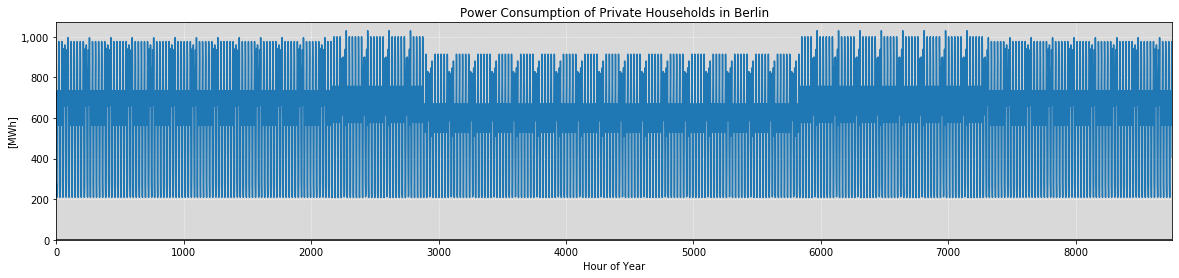

In [6]:
fig, ax = plt.subplots(figsize=(20, 4))
df_elc_tempo_ZVE['DE300'].plot(ax=ax)
plot.set_ax_format(ax=ax, xlim=(0, 8760), ylim=(0, None), ylabel='[MWh]', xlabel='Hour of Year',
                   axtitle='Power Consumption of Private Households in Berlin')

This depictation however does not provide a good visualization of what is happening on shorter timescales, i.e. within one day.

Therefore, we choose to plot it as a heatmap:

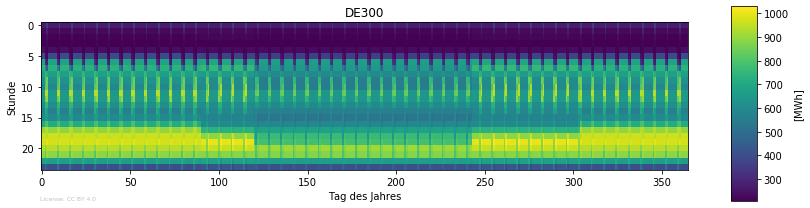

In [7]:
fig, ax = plot.heatmap_timeseries(df_elc_tempo_ZVE['DE300'], clabel='[MWh]')

# Power by 'Standard Load Profiles' (SLP, all years)
update Dec 2020

In [6]:
df_elec_temp_slp = temporal.disagg_temporal_power_housholds_slp(use_nuts3code=True, by='population', weight_by_income=False,  year=2016)

disaggregator.temporal: INFO     Working on state: SH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     ... assigning load-profiles
disaggregator.temporal: INFO     Working on s

In [10]:
df_elec_temp_slp.head()

,DEF01,DEF02,DEF03,DEF04,DEF05,DEF06,DEF07,DEF08,DEF09,DEF0A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
2016-01-01 00:00:00,2.521633,7.226888,6.345100,2.323727,3.899931,5.662803,4.810766,5.855720,9.021537,3.764580,...,3.216371,2.409696,1.667102,3.206336,2.528733,2.433873,2.966796,2.709474,1.244561,3.686856
2016-01-01 00:15:00,3.014247,8.638699,7.584649,2.777679,4.661802,6.769060,5.750575,6.999666,10.783941,4.500010,...,3.844706,2.880443,1.992780,3.832711,3.022734,2.909343,3.546375,3.238784,1.487693,4.407102
2016-01-01 00:30:00,2.793776,8.006839,7.029886,2.574512,4.320825,6.273952,5.329961,6.487690,9.995172,4.170867,...,3.563493,2.669759,1.847022,3.552376,2.801643,2.696546,3.286983,3.001890,1.378879,4.084754
2016-01-01 00:45:00,2.583640,7.404599,6.501127,2.380868,3.995831,5.802052,4.929064,5.999713,9.243378,3.857152,...,3.295462,2.468951,1.708097,3.285181,2.590915,2.493723,3.039750,2.776101,1.275165,3.777516
2016-01-01 01:00:00,2.380394,6.822104,5.989705,2.193573,3.681492,5.345624,4.541311,5.527736,8.516232,3.553723,...,3.036219,2.274727,1.573727,3.026747,2.387096,2.297550,2.800623,2.557714,1.174852,3.480351


... and can then be plotted directly:

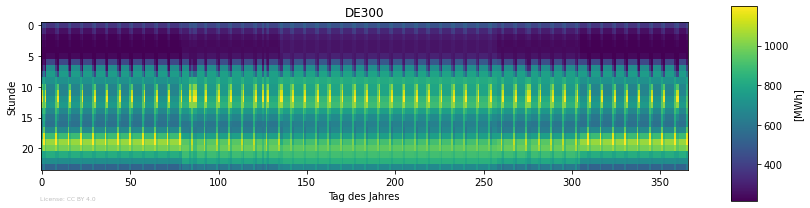

In [22]:
fig, ax = plot.heatmap_timeseries(df_elec_temp_slp.resample('H').sum()['DE300'], clabel='[MWh]')

# Gas by 'Standard Load Profiles' (SLP, all years)
update Dec 2020

Use ``disagg_temporal_gas_households()`` to get hourly gas demand of household per region in **MWh**. Function uses spatial function ``disagg_households_gas()``, which distinguishes between gas demand for heating, cooking and warm water. However, demands are summed up for SLP.
Demands are then split between demand for _single family houses (EFH)_ and _multi family houses (MFH)_ with the help of ``data.percentage_EFH_MFH()``, which calculates the percentages of EFH and MFH per NUTS-3 based on the available living spaces.

In [2]:
# use function disagg_daily_gas_slp_households similar as for CTS to create gas SLP for all years
# specify year either through config file (restart kernel after) or specify directly in function
df_households_gas = temporal.disagg_temporal_gas_households(use_nuts3code=True, year=2017)

disaggregator.data: INFO     Dropping old NUTS-v2013 regions.
disaggregator.temporal: INFO     Working on state: SH.
disaggregator.spatial: INFO     Calculating regional gas demands top-down.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     Working on state: HH.
disaggregator.spatial: INFO     Calculating regional gas demands top-down.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     Working on state: NI.
disaggregator.spatial: INFO     Calculating regional gas demands top-down.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     Working on state: HB.
disaggregator.spatial: INFO     Calculating regional gas demands top-down.
disaggregator.temporal: INFO     ... creating state-specific load-profiles
disaggregator.temporal: INFO     Working on state: NW.
disaggregator.spatial: INFO     Calculating regional gas demand

In [3]:
df_households_gas.head()

ags_lk,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
2017-01-01 00:00:00,247.970136,171.311272,281.113367,125.872131,266.244686,208.347180,62.342533,165.684524,53.524665,94.085525,...,49.787493,47.218522,27.872201,52.347202,37.868065,38.051811,49.844194,38.265077,21.422530,65.052095
2017-01-01 01:00:00,255.266509,175.778068,278.463519,129.143872,273.282283,213.908530,64.065576,169.735732,54.840805,96.421562,...,51.091460,48.366397,28.600643,53.714487,38.810643,39.008105,51.138051,39.291432,22.033458,66.648314
2017-01-01 02:00:00,259.485919,179.241110,278.304506,131.698171,278.573211,217.997188,65.232710,173.341775,55.998686,98.435370,...,52.092371,49.400465,29.162455,54.770412,39.618921,39.811575,52.151174,40.037623,22.416521,68.058786
2017-01-01 03:00:00,279.067315,191.888683,288.205123,140.975311,298.375998,233.576720,69.984907,185.161526,59.828412,105.201809,...,55.776980,52.758734,31.222809,58.638746,42.345931,42.565839,55.822194,42.906565,24.078406,72.708132
2017-01-01 04:00:00,335.122964,228.258824,331.764758,167.656364,355.292939,278.338809,83.620825,219.233280,70.865690,124.695593,...,66.370898,62.441432,37.147172,69.762039,50.201574,50.497132,66.380573,51.147924,28.841430,86.108619


plot df directly...

Text(0.5, 1.0, 'Gas Load Private Households Germany')

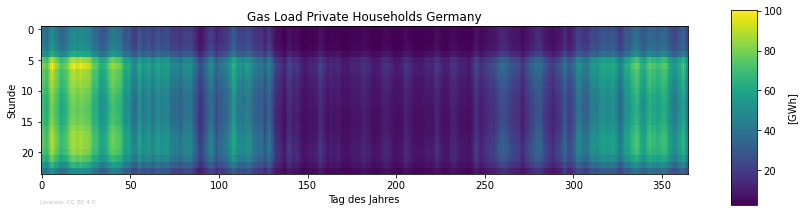

In [4]:
fig, ax = plot.heatmap_timeseries(df_households_gas.sum(axis=1)/1e3, clabel='[GWh]')
ax[0, 0].set_title('Gas Load Private Households Germany')

### older version below

normalized gas SLP for _single family houses_ (EFH) and _multi family houses (MFH)_ have been uploaded into the database untill 2016 as well. which could be used with ``temporal.disagg_temporal(df_spat, df_temp)`` and ``data.transpose_spatiotemporal()`` to perform the same disaggregation.

In [13]:
df_temp_EFH = data.standard_load_profile_gas(typ='EFH') # type='MFH'
df_temp_EFH

disaggregator.data: INFO     Merging old Göttingen+Osterode to new NUTS-v2016 region.


nuts3,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P,DE91C
2015-01-01 00:00:00,0.000175,0.000172,0.000181,0.000177,0.000180,0.000181,0.000153,0.000157,0.000155,0.000150,...,0.000136,0.000130,0.000134,0.000134,0.000133,0.000131,0.000135,0.000129,0.000131,0.000125
2015-01-01 01:00:00,0.000178,0.000174,0.000184,0.000180,0.000183,0.000184,0.000158,0.000162,0.000160,0.000155,...,0.000140,0.000132,0.000138,0.000138,0.000137,0.000135,0.000139,0.000133,0.000135,0.000128
2015-01-01 02:00:00,0.000183,0.000177,0.000187,0.000184,0.000187,0.000187,0.000161,0.000164,0.000162,0.000157,...,0.000143,0.000135,0.000141,0.000141,0.000140,0.000138,0.000142,0.000135,0.000137,0.000131
2015-01-01 03:00:00,0.000193,0.000186,0.000197,0.000194,0.000197,0.000197,0.000174,0.000177,0.000175,0.000169,...,0.000154,0.000143,0.000152,0.000151,0.000150,0.000149,0.000153,0.000145,0.000148,0.000141
2015-01-01 04:00:00,0.000224,0.000208,0.000222,0.000221,0.000222,0.000222,0.000207,0.000203,0.000201,0.000194,...,0.000179,0.000164,0.000180,0.000178,0.000179,0.000177,0.000182,0.000171,0.000172,0.000167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,0.000260,0.000235,0.000273,0.000242,0.000271,0.000260,0.000275,0.000275,0.000260,0.000255,...,0.000259,0.000229,0.000261,0.000253,0.000261,0.000264,0.000270,0.000239,0.000255,0.000239
2015-12-31 20:00:00,0.000250,0.000228,0.000263,0.000234,0.000262,0.000251,0.000264,0.000266,0.000252,0.000247,...,0.000250,0.000220,0.000250,0.000244,0.000250,0.000253,0.000260,0.000231,0.000246,0.000230
2015-12-31 21:00:00,0.000221,0.000204,0.000235,0.000208,0.000234,0.000225,0.000235,0.000238,0.000226,0.000221,...,0.000223,0.000196,0.000223,0.000217,0.000222,0.000226,0.000231,0.000205,0.000219,0.000205
2015-12-31 22:00:00,0.000158,0.000149,0.000172,0.000151,0.000171,0.000164,0.000169,0.000175,0.000165,0.000162,...,0.000163,0.000151,0.000161,0.000169,0.000160,0.000174,0.000166,0.000160,0.000172,0.000148


This dataframe has the NUTS-3-regions in columns and the timesteps in rows. Though being intuitive that way, the function ` temporal.disagg_temporal(df_spat, df_temp)` requires us to provide the temporal dataset _NUTS-3-index'ed_ (i.e. with timesteps in columns) for compatibility reasons. To achieve that, we use the function `data.transpose_spatiotemporal()`

In [15]:
df_temp_EFH = data.transpose_spatiotemporal(df_temp_EFH)
df_temp_MFH = data.transpose_spatiotemporal(df_temp_MFH)
df_temp_EFH

,0,1,2,3,4,5,6,7,8,9,...,8750,8751,8752,8753,8754,8755,8756,8757,8758,8759
nuts3,,,,,,,,,,,,,,,,,,,,,
DE111,0.000175,0.000178,0.000183,0.000193,0.000224,0.000290,0.000369,0.000342,0.000334,0.000324,...,0.000230,0.000237,0.000248,0.000258,0.000261,0.000260,0.000250,0.000221,0.000158,0.000126
DE112,0.000172,0.000174,0.000177,0.000186,0.000208,0.000267,0.000358,0.000326,0.000312,0.000304,...,0.000205,0.000209,0.000223,0.000233,0.000235,0.000235,0.000228,0.000204,0.000149,0.000119
DE113,0.000181,0.000184,0.000187,0.000197,0.000222,0.000286,0.000378,0.000346,0.000333,0.000324,...,0.000239,0.000244,0.000259,0.000270,0.000273,0.000273,0.000263,0.000235,0.000172,0.000137
DE114,0.000177,0.000180,0.000184,0.000194,0.000221,0.000284,0.000371,0.000341,0.000330,0.000320,...,0.000213,0.000218,0.000230,0.000240,0.000243,0.000242,0.000234,0.000208,0.000151,0.000120
DE115,0.000180,0.000183,0.000187,0.000197,0.000222,0.000285,0.000377,0.000345,0.000332,0.000323,...,0.000237,0.000242,0.000257,0.000268,0.000271,0.000271,0.000262,0.000234,0.000171,0.000136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DEG0L,0.000131,0.000135,0.000138,0.000149,0.000177,0.000254,0.000328,0.000305,0.000289,0.000277,...,0.000243,0.000247,0.000262,0.000266,0.000267,0.000264,0.000253,0.000226,0.000174,0.000149
DEG0M,0.000135,0.000139,0.000142,0.000153,0.000182,0.000262,0.000338,0.000314,0.000298,0.000286,...,0.000238,0.000245,0.000257,0.000268,0.000271,0.000270,0.000260,0.000231,0.000166,0.000133
DEG0N,0.000129,0.000133,0.000135,0.000145,0.000171,0.000245,0.000319,0.000296,0.000280,0.000269,...,0.000220,0.000223,0.000237,0.000241,0.000242,0.000239,0.000231,0.000205,0.000160,0.000137


Note: It is by design that the pd.DateTimeIndex gets lost while transposing this way for a better handling of the data. The former index is being recovered, one it is transposed again.

In [16]:
df_gas_st_EFH = temporal.disagg_temporal(df_gas_EFH, df_temp_EFH, time_indexed=True)
df_gas_st_MFH = temporal.disagg_temporal(df_gas_MFH, df_temp_MFH, time_indexed=True)
df_gas_st_EFH

nuts3,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
0,20.716632,45.234605,59.195138,33.968098,63.725355,49.048145,9.815829,52.906967,16.939199,28.601924,...,11.541571,13.467630,7.010504,11.918055,10.595872,10.228622,11.595045,7.604337,2.221464,17.764242
1,21.034128,45.739080,60.081956,34.480824,64.680042,49.782948,10.113279,54.700424,17.513409,29.571481,...,11.715783,13.928062,7.117128,12.279209,10.914203,10.538580,11.946410,7.834771,2.288203,18.371566
2,21.669120,46.579872,61.190479,35.249913,65.873400,50.701453,10.325743,55.372970,17.728738,29.935064,...,11.977102,14.158278,7.303719,12.537175,11.141582,10.759979,12.197385,7.999367,2.335874,18.675229
3,22.859731,48.934089,64.516049,37.172636,69.453477,53.456967,11.133105,59.632429,19.092487,32.237762,...,12.630398,15.251803,7.703558,13.517448,11.960147,11.601294,13.151089,8.624832,2.507490,20.117624
4,26.510939,54.819633,72.719120,42.299896,78.284331,60.253901,13.215251,68.599712,21.963538,37.085545,...,14.372522,17.726624,8.849762,16.045520,14.097512,13.771001,15.610644,10.237873,2.955596,23.381994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30.792166,61.911240,89.104422,46.450064,95.672731,70.462767,17.603949,92.839626,28.389489,48.797119,...,20.009782,25.660437,12.320289,23.260219,20.052506,20.094974,23.293658,15.201925,4.132440,34.636785
8756,29.511699,59.949696,86.104867,44.794418,92.452065,68.090753,16.906763,89.898172,27.490020,47.251072,...,19.308408,24.796620,11.837639,22.339022,19.349634,19.299134,22.381123,14.599869,3.987592,33.494128
8757,26.158097,53.697274,76.929758,39.827481,82.600616,60.835181,15.024360,80.522289,24.622963,42.323046,...,17.163029,22.154357,10.542103,19.851790,17.199675,17.150364,19.931686,12.974316,3.544526,29.851909
8758,18.719198,39.353481,56.109319,28.881822,60.245403,44.370613,10.841244,59.012911,18.045596,31.017575,...,13.367359,16.158453,8.128851,14.324610,13.395901,12.375321,15.369011,9.361978,2.760641,23.353049


Sum these consumption for both building types up:

In [17]:
df_gas_st = df_gas_st_EFH + df_gas_st_MFH
df_gas_st

nuts3,DE111,DE112,DE113,DE114,DE115,DE116,DE117,DE118,DE119,DE11A,...,DEG0F,DEG0G,DEG0H,DEG0I,DEG0J,DEG0K,DEG0L,DEG0M,DEG0N,DEG0P
0,206.170388,140.190103,202.667750,105.224867,215.091334,174.672309,46.664946,125.313498,40.966770,71.888898,...,37.601944,31.987246,22.623693,39.149205,27.469076,27.904335,36.820917,28.991814,14.353573,43.707776
1,211.500148,143.673574,208.038088,107.955702,220.776207,179.332868,49.481993,132.482112,43.324687,76.071898,...,38.587374,33.730421,23.153930,41.372317,28.951076,29.422889,38.897128,30.684640,15.257009,46.112055
2,214.999291,146.748613,211.948810,110.111110,224.925933,182.704969,50.324357,134.735586,44.064635,77.380612,...,39.355704,34.361495,23.643103,42.095773,29.542102,29.946436,39.579315,31.214834,15.566148,46.977266
3,231.226693,156.922695,227.043618,117.579106,240.922749,195.765590,54.438691,146.899689,48.051481,84.408961,...,42.037045,37.298965,25.313782,45.519867,31.960713,32.374033,42.796880,33.759688,16.888222,51.002784
4,278.556198,181.054589,264.950003,138.233133,281.091092,228.570652,66.599228,174.521929,57.113042,100.409284,...,49.457693,44.664247,29.969928,55.495775,38.607296,39.378124,52.155819,41.222296,20.578529,61.118043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,314.090461,203.074292,317.413566,150.167164,335.982110,262.806997,83.355251,224.816658,70.565079,125.910215,...,66.191563,61.206344,40.016742,75.331808,52.080561,54.080492,72.791854,56.915518,26.838796,85.493281
8756,306.463190,197.950235,309.299142,146.187917,327.377730,256.125845,81.185021,218.918489,68.720740,122.636583,...,64.034881,59.546183,38.661304,73.244038,50.368402,52.523265,70.319502,55.378941,25.978411,82.748003
8757,279.453315,180.485269,281.524511,132.771521,297.949142,233.200682,73.812184,199.059705,62.503687,111.583484,...,58.202722,54.008123,35.154707,66.408670,45.661581,47.536601,63.918529,50.270176,23.722653,75.045812
8758,237.972461,146.591400,230.479847,108.517966,243.781079,191.273030,61.460372,159.272448,50.085301,89.598399,...,49.653045,43.306549,30.006721,54.412310,38.560801,38.539324,54.468427,41.475497,20.601348,63.098041


Instead of selecting one specific region, this time we choose to sum it up for the entire country:

In [18]:
ser_gas = df_gas_st.sum(axis=1)

Now we can plot this one again as well:

Text(0.5, 1, 'Gas Load Private Households Germany')

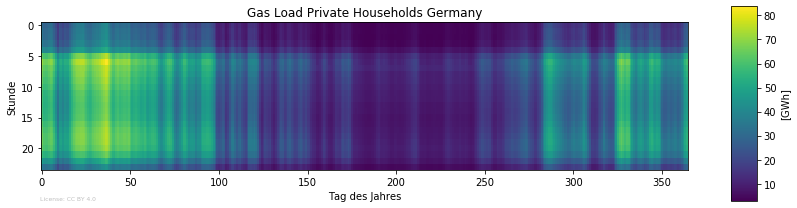

In [19]:
fig, ax = plot.heatmap_timeseries(ser_gas/1e3, clabel='[GWh]')
ax[0, 0].set_title('Gas Load Private Households Germany')